### Method First - Solving using LinearRegression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("IceCreamSales.csv")

In [3]:
data

,Unnamed: 0,Temperature,IceCreamSales
0,0,21.952540,21200.216232
1,1,28.607575,46969.537759
2,2,24.110535,28155.054323
3,3,21.795327,20730.330804
4,4,16.946192,9907.404501
...,...,...,...
95,95,7.327654,920.989509
96,96,23.460517,25884.973575
97,97,0.804302,66.563119
98,98,33.157601,72985.915190


In [4]:
data.drop('Unnamed: 0', inplace = True, axis =1 )

In [5]:
data

,Temperature,IceCreamSales
0,21.952540,21200.216232
1,28.607575,46969.537759
2,24.110535,28155.054323
3,21.795327,20730.330804
4,16.946192,9907.404501
...,...,...
95,7.327654,920.989509
96,23.460517,25884.973575
97,0.804302,66.563119
98,33.157601,72985.915190


<Axes: xlabel='Temperature', ylabel='IceCreamSales'>

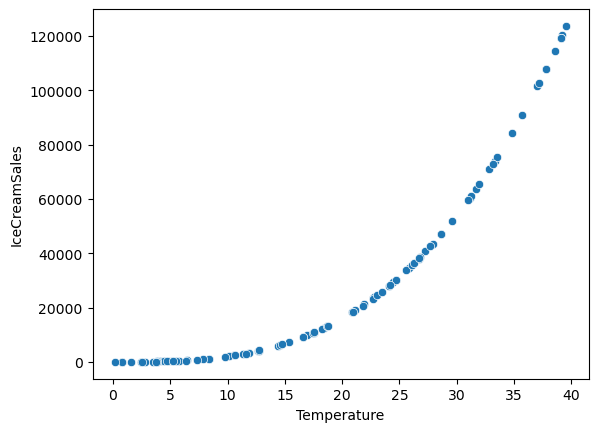

In [6]:
sns.scatterplot(x = data['Temperature'], y='IceCreamSales', data = data)

In [7]:
X = data[['Temperature']]
y = data['IceCreamSales']

In [8]:
X

,Temperature
0,21.952540
1,28.607575
2,24.110535
3,21.795327
4,16.946192
...,...
95,7.327654
96,23.460517
97,0.804302
98,33.157601


In [9]:
y

0     21200.216232
1     46969.537759
2     28155.054323
3     20730.330804
4      9907.404501
          ...     
95      920.989509
96    25884.973575
97       66.563119
98    72985.915190
99      100.887209
Name: IceCreamSales, Length: 100, dtype: float64

In [10]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [11]:
x_train.shape

(80, 1)

In [12]:
x_test.shape

(20, 1)

In [13]:
L_reg = LinearRegression()

In [14]:
L_reg.fit(x_train,y_train)

LinearRegression()

In [15]:
y_pred=L_reg.predict(x_test)

In [16]:
print(f"Accuracy is {r2_score(y_test,y_pred)}")

Accuracy is 0.8241892452306521


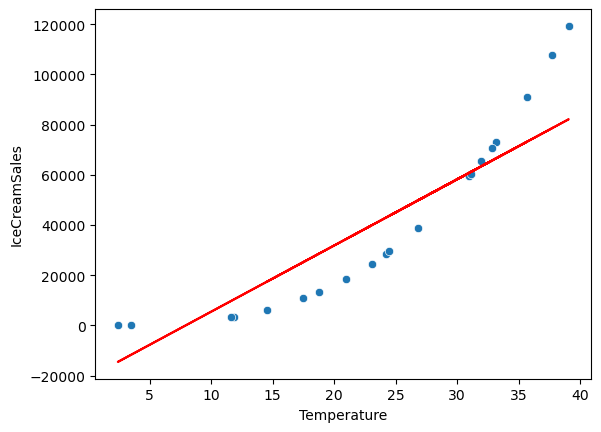

In [17]:
ax = sns.scatterplot(x = x_test['Temperature'], y=y_test)
ax.plot(x_test,y_pred, c = 'r')

### Method 2nd -  Solving using Polynomial - LinearRegression

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [19]:
X = data[['Temperature']]
y = data['IceCreamSales']

In [20]:
X

,Temperature
0,21.952540
1,28.607575
2,24.110535
3,21.795327
4,16.946192
...,...
95,7.327654
96,23.460517
97,0.804302
98,33.157601


<Axes: xlabel='Temperature', ylabel='IceCreamSales'>

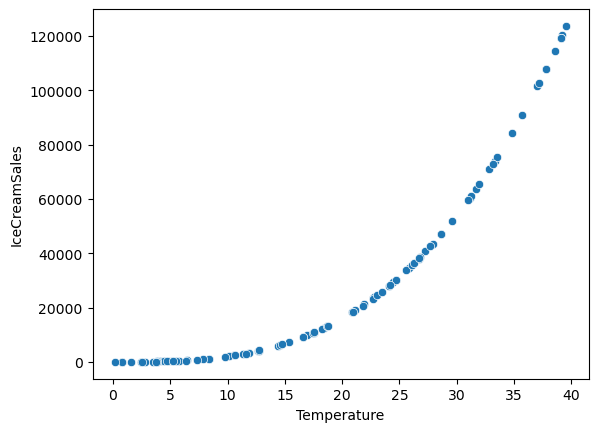

In [21]:
sns.scatterplot(x = data['Temperature'], y=data['IceCreamSales'], data = data)

### Training the model with degree as 2 

In [22]:
poly_transformation = PolynomialFeatures(2)   # taking degrre as 2
X_transform = poly_transformation.fit_transform(X)

In [23]:
X_transform[:5]

array([[  1.        ,  21.95254016, 481.91401935],
       [  1.        ,  28.60757465, 818.39332764],
       [  1.        ,  24.11053504, 581.31790005],
       [  1.        ,  21.79532732, 475.03629298],
       [  1.        ,  16.94619197, 287.1734224 ]])

In [24]:
LinearX = X_transform[:,2]        # taking all rows of 2nd degree column for further training

In [25]:
LinearX

array([4.81914019e+02, 8.18393328e+02, 5.81317900e+02, 4.75036293e+02,
       2.87173422e+02, 6.67486728e+02, 3.06372108e+02, 1.27241454e+03,
       1.48583347e+03, 2.35243837e+02, 1.00292566e+03, 4.47567738e+02,
       5.16279397e+02, 1.37076662e+03, 8.07379450e+00, 1.21464238e+01,
       6.54053752e-01, 1.10920929e+03, 9.68844686e+02, 1.21107382e+03,
       1.53231018e+03, 1.02184706e+03, 3.40741123e+02, 9.74761272e+02,
       2.23821437e+01, 6.55198262e+02, 3.28802640e+01, 1.42783898e+03,
       4.35721073e+02, 2.75111239e+02, 1.11983475e+02, 9.59100489e+02,
       3.32917001e+02, 5.16987447e+02, 5.64890561e-01, 6.10357772e+02,
       5.99457878e+02, 6.08972090e+02, 1.42505670e+03, 7.43806272e+02,
       2.06793489e+02, 3.05595086e+02, 7.78702857e+02, 5.80337189e+00,
       7.11324565e+02, 7.19608243e+02, 7.08173152e+01, 2.65951844e+01,
       1.59192071e+02, 2.11656840e+02, 5.20198971e+02, 3.07794060e+02,
       1.56301255e+03, 1.66610294e+01, 6.98071988e+01, 4.16332169e+01,
      

In [26]:
LinearX.reshape(-1,1) # conversion of 1d to 2d

array([[4.81914019e+02],
       [8.18393328e+02],
       [5.81317900e+02],
       [4.75036293e+02],
       [2.87173422e+02],
       [6.67486728e+02],
       [3.06372108e+02],
       [1.27241454e+03],
       [1.48583347e+03],
       [2.35243837e+02],
       [1.00292566e+03],
       [4.47567738e+02],
       [5.16279397e+02],
       [1.37076662e+03],
       [8.07379450e+00],
       [1.21464238e+01],
       [6.54053752e-01],
       [1.10920929e+03],
       [9.68844686e+02],
       [1.21107382e+03],
       [1.53231018e+03],
       [1.02184706e+03],
       [3.40741123e+02],
       [9.74761272e+02],
       [2.23821437e+01],
       [6.55198262e+02],
       [3.28802640e+01],
       [1.42783898e+03],
       [4.35721073e+02],
       [2.75111239e+02],
       [1.11983475e+02],
       [9.59100489e+02],
       [3.32917001e+02],
       [5.16987447e+02],
       [5.64890561e-01],
       [6.10357772e+02],
       [5.99457878e+02],
       [6.08972090e+02],
       [1.42505670e+03],
       [7.43806272e+02],


In [27]:
LinearX = LinearX.reshape(-1,1)   #conversion of 1d to 2d storing into variable

### Training the model 

In [28]:
x_train,x_test,y_train,y_test = train_test_split(LinearX,y,test_size=0.2)
L_reg = LinearRegression()
L_reg.fit(x_train,y_train)
y_pred=L_reg.predict(x_test)

In [29]:
#  checking accuracy of model

r2_score_2 = r2_score(y_test,y_pred)
print(f'The r2_score/accuracy value is - {r2_score_2}')

The r2_score/accuracy value is - 0.9711829690209048


In [30]:
x_test

array([[2.31155413e+01],
       [3.07794060e+02],
       [1.21107382e+03],
       [8.20999461e+02],
       [4.04341256e+01],
       [9.59100489e+02],
       [5.30742985e+02],
       [8.18393328e+02],
       [2.06793489e+02],
       [5.81317900e+02],
       [1.52649956e+03],
       [5.36945202e+01],
       [1.40318427e+02],
       [1.27241454e+03],
       [5.16987447e+02],
       [3.06372108e+02],
       [1.37076662e+03],
       [2.25540340e+01],
       [6.46901462e-01],
       [4.81914019e+02]])

In [31]:
x_test.flatten() #X_test was 2d so using .flatten() converting it to 1d 

array([2.31155413e+01, 3.07794060e+02, 1.21107382e+03, 8.20999461e+02,
       4.04341256e+01, 9.59100489e+02, 5.30742985e+02, 8.18393328e+02,
       2.06793489e+02, 5.81317900e+02, 1.52649956e+03, 5.36945202e+01,
       1.40318427e+02, 1.27241454e+03, 5.16987447e+02, 3.06372108e+02,
       1.37076662e+03, 2.25540340e+01, 6.46901462e-01, 4.81914019e+02])

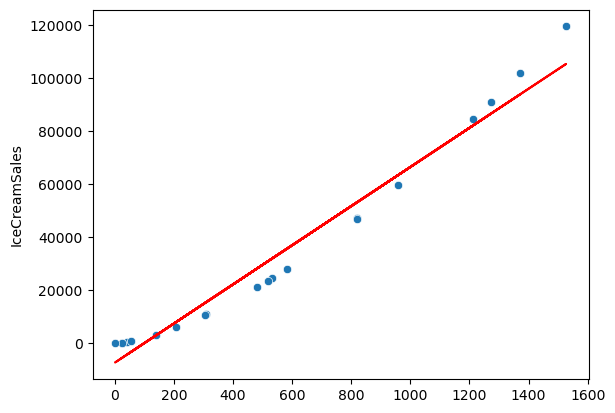

In [32]:
ax = sns.scatterplot(x = x_test.flatten(), y=y_test)
ax.plot(x_test.flatten(),y_pred, c = 'r')

### Training the model with degree as 3 

first five rows of all columns of X_transform  are - 
[[1.00000000e+00 2.19525402e+01 4.81914019e+02 1.05792369e+04]
 [1.00000000e+00 2.86075747e+01 8.18393328e+02 2.34122482e+04]
 [1.00000000e+00 2.41105350e+01 5.81317900e+02 1.40158856e+04]
 [1.00000000e+00 2.17953273e+01 4.75036293e+02 1.03535715e+04]
 [1.00000000e+00 1.69461920e+01 2.87173422e+02 4.86649595e+03]]
Values of dependent variable y are - 
0     21200.216232
1     46969.537759
2     28155.054323
3     20730.330804
4      9907.404501
          ...     
95      920.989509
96    25884.973575
97       66.563119
98    72985.915190
99      100.887209
Name: IceCreamSales, Length: 100, dtype: float64
The r2_score/accuracy value is 
0.9999957425946949


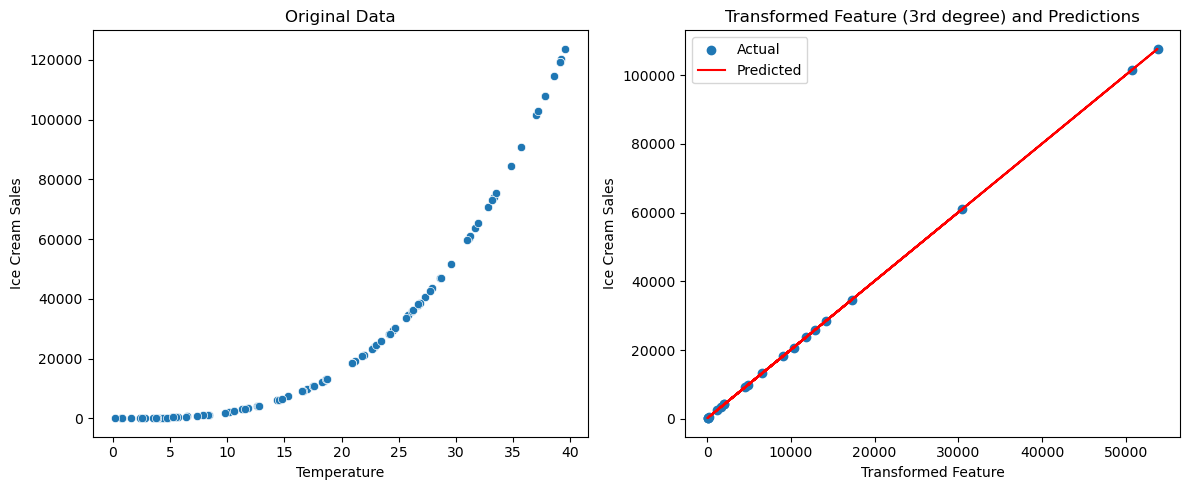

In [33]:
X = data[['Temperature']]
y = data['IceCreamSales']

poly_transformation = PolynomialFeatures(3) 
X_transform = poly_transformation.fit_transform(X)
print(f"first five rows of all columns of X_transform  are - \n{X_transform[:5]}") # first five rows of all columns

LinearX = X_transform[:,3]  # taking all rows of 3rd degree column for further training
LinearX = LinearX.reshape(-1,1) #conversion of 1d to 2d storing into variable
print(f"Values of dependent variable y are - \n{y}")

# Training the model
X_train,X_test,y_train,y_test = train_test_split(LinearX, y, test_size=0.2)

l_reg = LinearRegression()

l_reg.fit(X_train,y_train)

y_pred = l_reg.predict(X_test)

#  checking accuracy of model

r2_score_3 = r2_score(y_test,y_pred)
print(f'The r2_score/accuracy value is \n{r2_score_3}')

# Scatter plot for original data
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Temperature', y='IceCreamSales', data=data)
plt.title('Original Data')
plt.xlabel('Temperature')
plt.ylabel('Ice Cream Sales')

# Plotting scatter plot for transformed feature and predictions
plt.subplot(1, 2, 2)
plt.scatter(X_test.flatten(), y_test, label='Actual')
plt.plot(X_test.flatten(), y_pred, c='r', label='Predicted')
plt.title('Transformed Feature (3rd degree) and Predictions')
plt.xlabel('Transformed Feature')
plt.ylabel('Ice Cream Sales')
plt.legend()

plt.tight_layout()
plt.show()

### Training the model with degree as 4

first five rows of all columns of X_transform  are - 
[[1.00000000e+00 2.19525402e+01 4.81914019e+02 1.05792369e+04
  2.32241122e+05]
 [1.00000000e+00 2.86075747e+01 8.18393328e+02 2.34122482e+04
  6.69767639e+05]
 [1.00000000e+00 2.41105350e+01 5.81317900e+02 1.40158856e+04
  3.37930501e+05]
 [1.00000000e+00 2.17953273e+01 4.75036293e+02 1.03535715e+04
  2.25659480e+05]
 [1.00000000e+00 1.69461920e+01 2.87173422e+02 4.86649595e+03
  8.24685745e+04]]
Values of dependent variable y are - 
0     21200.216232
1     46969.537759
2     28155.054323
3     20730.330804
4      9907.404501
          ...     
95      920.989509
96    25884.973575
97       66.563119
98    72985.915190
99      100.887209
Name: IceCreamSales, Length: 100, dtype: float64
The r2_score/accuracy value is 
0.9773707583936257


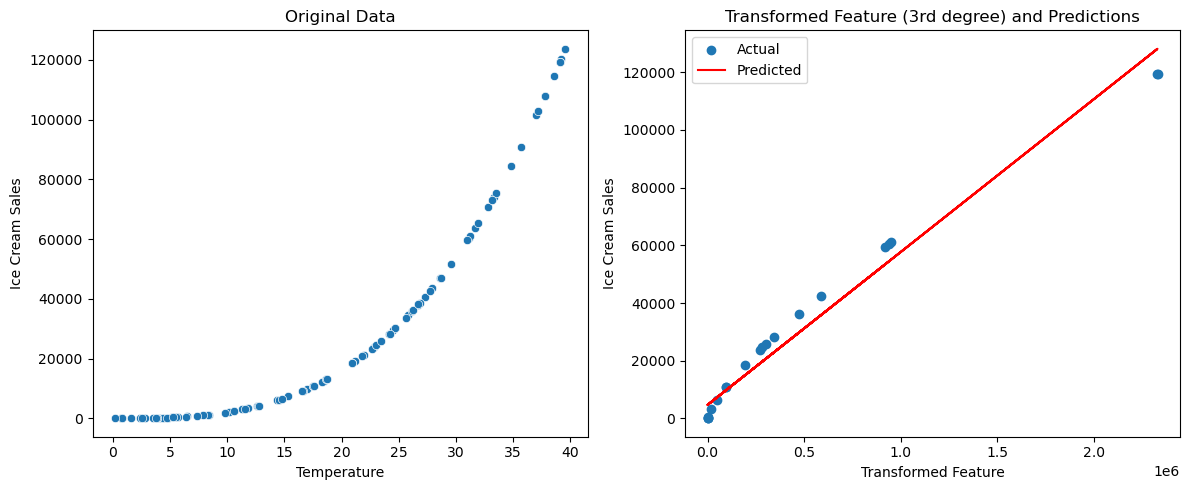

In [34]:
poly_transformation = PolynomialFeatures(4) 
X_transform = poly_transformation.fit_transform(X)
print(f"first five rows of all columns of X_transform  are - \n{X_transform[:5]}") # first five rows of all columns

LinearX = X_transform[:,4]  # taking all rows of 4th degree column for further training
LinearX = LinearX.reshape(-1,1) #conversion of 1d to 2d storing into variable
print(f"Values of dependent variable y are - \n{y}")

# Training the model
X_train,X_test,y_train,y_test = train_test_split(LinearX, y, test_size=0.2)

l_reg = LinearRegression()

l_reg.fit(X_train,y_train)

y_pred = l_reg.predict(X_test)

#  checking accuracy of model

r2_score_4 = r2_score(y_test,y_pred)
print(f'The r2_score/accuracy value is \n{r2_score_4}')

# Scatter plot for original data
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Temperature', y='IceCreamSales', data=data)
plt.title('Original Data')
plt.xlabel('Temperature')
plt.ylabel('Ice Cream Sales')

# Plotting scatter plot for transformed feature and predictions
plt.subplot(1, 2, 2)
plt.scatter(X_test.flatten(), y_test, label='Actual')
plt.plot(X_test.flatten(), y_pred, c='r', label='Predicted')
plt.title('Transformed Feature (3rd degree) and Predictions')
plt.xlabel('Transformed Feature')
plt.ylabel('Ice Cream Sales')
plt.legend()

plt.tight_layout()
plt.show()

### Training the model with degree as 5 

first five rows of all columns of X_transform  are - 
[[1.00000000e+00 2.19525402e+01 4.81914019e+02 1.05792369e+04
  2.32241122e+05 5.09828256e+06]
 [1.00000000e+00 2.86075747e+01 8.18393328e+02 2.34122482e+04
  6.69767639e+05 1.91604277e+07]
 [1.00000000e+00 2.41105350e+01 5.81317900e+02 1.40158856e+04
  3.37930501e+05 8.14768518e+06]
 [1.00000000e+00 2.17953273e+01 4.75036293e+02 1.03535715e+04
  2.25659480e+05 4.91832222e+06]
 [1.00000000e+00 1.69461920e+01 2.87173422e+02 4.86649595e+03
  8.24685745e+04 1.39752830e+06]]
Values of dependent variable y are - 
0     21200.216232
1     46969.537759
2     28155.054323
3     20730.330804
4      9907.404501
          ...     
95      920.989509
96    25884.973575
97       66.563119
98    72985.915190
99      100.887209
Name: IceCreamSales, Length: 100, dtype: float64
The r2_score/accuracy value is 
0.9533227054335709


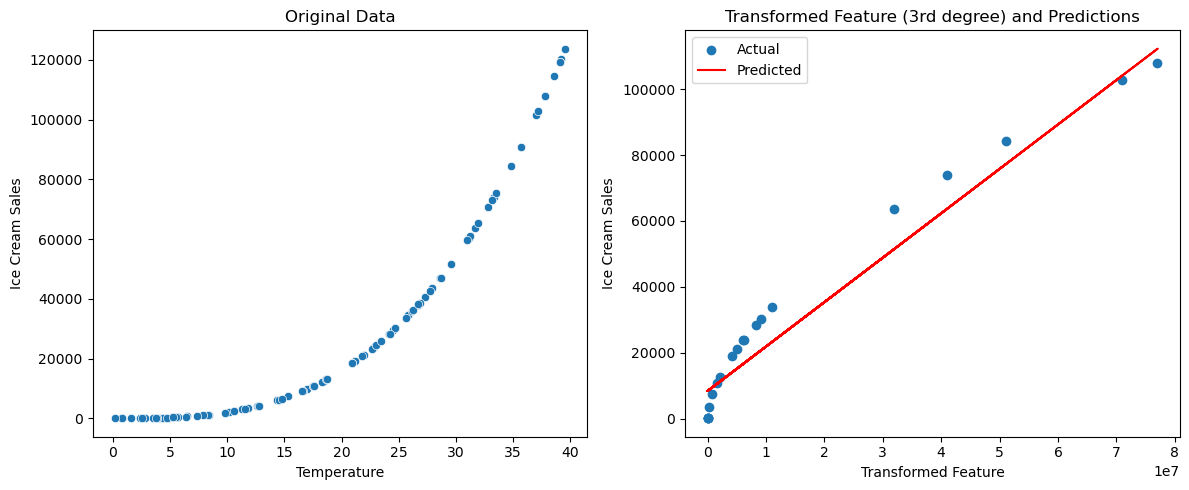

In [35]:
poly_transformation = PolynomialFeatures(5) 
X_transform = poly_transformation.fit_transform(X)
print(f"first five rows of all columns of X_transform  are - \n{X_transform[:5]}") # first five rows of all columns

LinearX = X_transform[:,5]  # taking all rows of 4th degree column for further training
LinearX = LinearX.reshape(-1,1) #conversion of 1d to 2d storing into variable
print(f"Values of dependent variable y are - \n{y}")

# Training the model
X_train,X_test,y_train,y_test = train_test_split(LinearX, y, test_size=0.2)

l_reg = LinearRegression()

l_reg.fit(X_train,y_train)

y_pred = l_reg.predict(X_test)

#  checking accuracy of model

r2_score_5 = r2_score(y_test,y_pred)
print(f'The r2_score/accuracy value is \n{r2_score_5}')

# Scatter plot for original data
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Temperature', y='IceCreamSales', data=data)
plt.title('Original Data')
plt.xlabel('Temperature')
plt.ylabel('Ice Cream Sales')

# Plotting scatter plot for transformed feature and predictions
plt.subplot(1, 2, 2)
plt.scatter(X_test.flatten(), y_test, label='Actual')
plt.plot(X_test.flatten(), y_pred, c='r', label='Predicted')
plt.title('Transformed Feature (3rd degree) and Predictions')
plt.xlabel('Transformed Feature')
plt.ylabel('Ice Cream Sales')
plt.legend()

plt.tight_layout()
plt.show()

### From scatter plots we can see that if we increase degree more that 3 models r2_score values will start decreasing and it starts overfitting. 